In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [2]:
data = pd.read_csv('spotify_unique_ver4.csv')

### release_date 以年表示

In [3]:
tem = []
for i in range(data.shape[0]):
    tem.append(data['release_date'][i].split('-')[0])
data['release_date'] = tem
data.head()

,song_name,artist_name,release_date,popularity,genres,artist_popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,我們的基因,Kay Tse,2019,51,c-pop,57,0.701,0.635,279547.0,0.445,0.000000,1,0.1810,-8.185,0,0.0333,131.399,0.436
1,忘記和記,Juno Mak,2019,50,c-pop,55,0.650,0.678,157156.0,0.498,0.000000,6,0.0602,-13.582,0,0.0407,140.053,0.406
2,Two at a time,AGA,2019,53,c-pop,54,0.686,0.763,261639.0,0.561,0.000003,8,0.1110,-6.806,1,0.0290,89.251,0.372
3,"讓愛高飛 - 劇集 ""多功能老婆"" 片尾曲",Pakho Chau,2019,51,c-pop,55,0.710,0.485,220286.0,0.377,0.000000,10,0.1190,-9.091,1,0.0300,139.976,0.355
4,爸爸的禮物,Jason Chan,2019,38,c-pop,54,0.695,0.582,272909.0,0.413,0.000000,2,0.2430,-8.034,0,0.0240,82.984,0.214


### 刪除2020年資料(1筆)

In [4]:
data = data[data['release_date']!='2020']

### overall top artist
artist_popularity > 75% 才算popular

In [5]:
data.describe()

,popularity,artist_popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,14859.000000,14859.00000,14859.000000,14859.000000,1.485900e+04,14859.000000,14859.000000,14859.000000,14859.000000,14859.000000,14859.000000,14859.000000,14859.000000,14859.000000
mean,45.881621,57.08399,0.458002,0.550720,2.280638e+05,0.498404,0.273286,5.130157,0.167409,-10.980746,0.661148,0.080963,115.901927,0.389097
std,19.527207,18.31537,0.383131,0.191594,1.155707e+05,0.298396,0.395467,3.554399,0.133289,7.885636,0.473335,0.095275,30.413326,0.244076
min,0.000000,0.00000,0.000000,0.000000,2.034700e+04,0.000020,0.000000,0.000000,0.020200,-49.645000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,45.00000,0.062700,0.426000,1.792200e+05,0.235000,0.000000,2.000000,0.095800,-14.377000,0.000000,0.035900,92.186000,0.187500
50%,49.000000,57.00000,0.396000,0.572000,2.118750e+05,0.520000,0.000137,5.000000,0.115000,-8.030000,1.000000,0.045700,117.224000,0.360000
75%,59.000000,70.00000,0.874000,0.693000,2.525935e+05,0.757000,0.784000,8.000000,0.183000,-5.375500,1.000000,0.076050,134.000500,0.568000
max,100.000000,100.00000,0.996000,0.983000,3.600040e+06,1.000000,0.999000,11.000000,0.977000,0.634000,1.000000,0.952000,241.046000,0.988000


In [6]:
# 權重計算
tlist = data[data.artist_popularity.values>=70][['artist_popularity','artist_name']]
tlist.index =data[data.artist_popularity.values>=70].artist_name
tlist = tlist.drop_duplicates(['artist_name'])
tlist = tlist['artist_popularity']
print(type(tlist))
tlist.sort_values(ascending=False)

<class 'pandas.core.series.Series'>


artist_name
Post Malone            100
J Balvin                99
Ozuna                   98
Drake                   98
Travis Scott            97
Billie Eilish           97
Bad Bunny               97
Ed Sheeran              97
Khalid                  96
Anuel AA                96
Ariana Grande           96
Daddy Yankee            95
Taylor Swift            95
Kanye West              95
Camila Cabello          94
Sech                    94
Nicky Jam               94
Juice WRLD              94
Justin Bieber           94
Eminem                  94
XXXTENTACION            93
Shawn Mendes            93
Young Thug              93
Selena Gomez            93
Maroon 5                93
DaBaby                  93
Chris Brown             93
Trippie Redd            92
Sam Smith               92
Queen                   92
                      ... 
Ennio Morricone         70
Tate McRae              70
Placebo                 70
AWOLNATION              70
for KING & COUNTRY      70
Vini Vici       

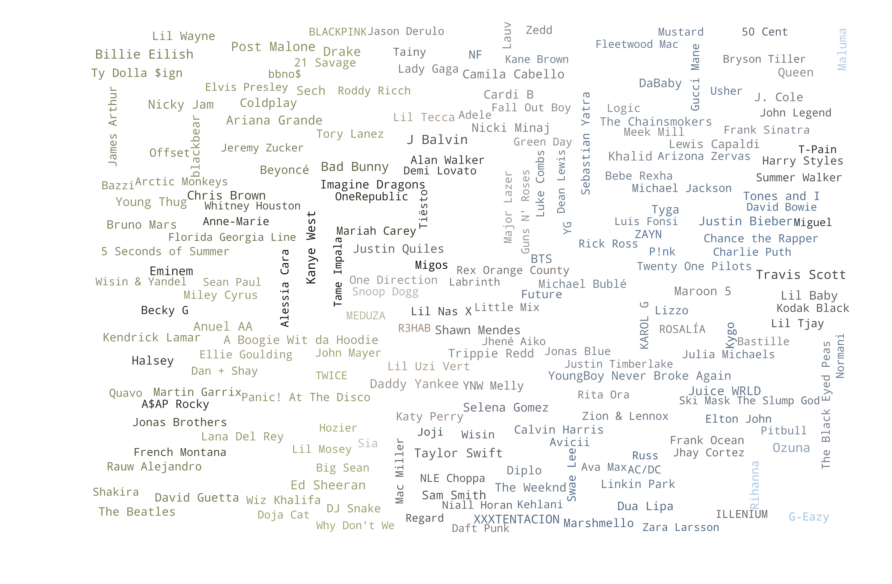

In [10]:
from PIL import Image
import os
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
string=' '.join(data[data.artist_popularity.values>=70].artist_name)
plt.figure(dpi=150) 
# 設定字體（要能支援中文顯示的）
font_path = '/System/Library/Fonts/PingFang.ttc'  
# 讀背景圖片
background_Image = np.array(Image.open("1.JPG"))
# 提取背景圖片顏色
img_colors = ImageColorGenerator(background_Image)
# 設置stopwords 
stopwords = set(STOPWORDS)
#stopwords.add('object')           #如果有顯眼的無關詞，要加入到stopword
wc = WordCloud(
        #font_path = font_path,    # 字體路徑
        margin = 2,                # 頁面邊緣
        mask = background_Image,
        #scale = 3,
        max_words = 200,          # 最多顯示多少詞
        min_font_size = 4,        # 最小的字的字體大小
        stopwords = stopwords,
        random_state = 42,
        background_color = 'white', # 背景颜色
        max_font_size = 100,
)
#wc.generate(string)
wc.generate_from_frequencies(tlist)
wc.recolor(color_func = img_colors)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()    

In [11]:
# 權重計算
tlist2 = data[data.popularity.values>=59][['popularity','song_name']]
tlist2.index =data[data.popularity.values>=59].artist_name
tlist2 = tlist2.drop_duplicates(['song_name'])
tlist2 = tlist2['popularity']
print(type(tlist2))
tlist.sort_values(ascending=False)

<class 'pandas.core.series.Series'>


artist_name
Post Malone            100
J Balvin                99
Ozuna                   98
Drake                   98
Travis Scott            97
Billie Eilish           97
Bad Bunny               97
Ed Sheeran              97
Khalid                  96
Anuel AA                96
Ariana Grande           96
Daddy Yankee            95
Taylor Swift            95
Kanye West              95
Camila Cabello          94
Sech                    94
Nicky Jam               94
Juice WRLD              94
Justin Bieber           94
Eminem                  94
XXXTENTACION            93
Shawn Mendes            93
Young Thug              93
Selena Gomez            93
Maroon 5                93
DaBaby                  93
Chris Brown             93
Trippie Redd            92
Sam Smith               92
Queen                   92
                      ... 
Ennio Morricone         70
Tate McRae              70
Placebo                 70
AWOLNATION              70
for KING & COUNTRY      70
Vini Vici       

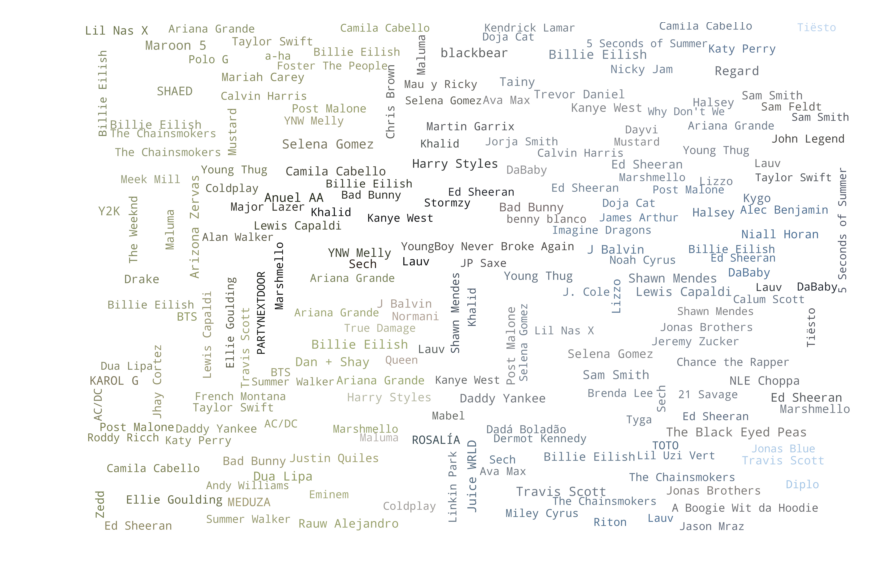

In [13]:
from PIL import Image
import os
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
string=' '.join(data[data.popularity.values>=59].song_name)
plt.figure(dpi=150) 
# 設定字體（要能支援中文顯示的）
font_path = '/System/Library/Fonts/PingFang.ttc'  
# 讀背景圖片
background_Image = np.array(Image.open("1.JPG"))
# 提取背景圖片顏色
img_colors = ImageColorGenerator(background_Image)
# 設置stopwords 
stopwords = set(STOPWORDS)
#stopwords.add('object')           #如果有顯眼的無關詞，要加入到stopword
wc = WordCloud(
        #font_path = font_path,    # 字體路徑
        margin = 2,                # 頁面邊緣
        mask = background_Image,
        #scale = 3,
        max_words = 200,          # 最多顯示多少詞
        min_font_size = 4,        # 最小的字的字體大小
        stopwords = stopwords,
        random_state = 42,
        background_color = 'white', # 背景颜色
        max_font_size = 100,
)
#wc.generate(string)
wc.generate_from_frequencies(tlist2)
wc.recolor(color_func = img_colors)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()    